In [2]:
import numpy as np
import pandas as pd
from sklearn import tree

In [3]:
from google.colab import files

# Abre uma janela para você escolher os arquivos no seu computador
uploaded = files.upload()

Saving pastHires.csv.csv to pastHires.csv.csv


In [4]:
df = pd.read_csv('pastHires.csv.csv')

In [5]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [6]:
# Dicionário que converte respostas 'Y' (sim) e 'N' (não) em valores numéricos 1 e 0
d = {'Y': 1, 'N': 0}

# Aplica a conversão na coluna 'Hired', transformando 'Y' em 1 e 'N' em 0
df['Hired'] = df['Hired'].map(d)

# Faz o mesmo para a coluna 'Employed?' (ex: se a pessoa está empregada ou não)
df['Employed?'] = df['Employed?'].map(d)

# Converte a informação de se estudou em uma universidade de elite (sim ou não)
df['Top-tier school'] = df['Top-tier school'].map(d)

# Converte a informação de se a pessoa fez estágio (internship), também com Y/N → 1/0
df['Interned'] = df['Interned'].map(d)

# Novo dicionário para transformar os níveis educacionais em valores numéricos
# BS (graduação) = 0, MS (mestrado) = 1, PhD (doutorado) = 2
d = {'BS': 0, 'MS': 1, 'PhD': 2}

# Aplica essa codificação à coluna 'Level of Education'
df['Level of Education'] = df['Level of Education'].map(d)

# Mostra as primeiras 5 linhas do DataFrame para conferir as alterações
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [7]:
# Seleciona as 6 primeiras colunas do DataFrame como um subconjunto de "features" (variáveis independentes)
features = list(df.columns[:6])

# Exibe a lista de nomes dessas colunas selecionadas
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [9]:
# Define a variável alvo (target) que será prevista: se a pessoa foi contratada (1) ou não (0)
y = df['Hired']

# Define as variáveis independentes (features) que serão usadas para prever a contratação
x = df[features]  # Usa as 6 colunas selecionadas anteriormente como preditores

# Cria um classificador do tipo Árvore de Decisão (Decision Tree Classifier)
clf = tree.DecisionTreeClassifier()

# Treina o modelo (ajusta o classificador) com os dados de entrada (x) e saída (y)
clf = clf.fit(x, y)

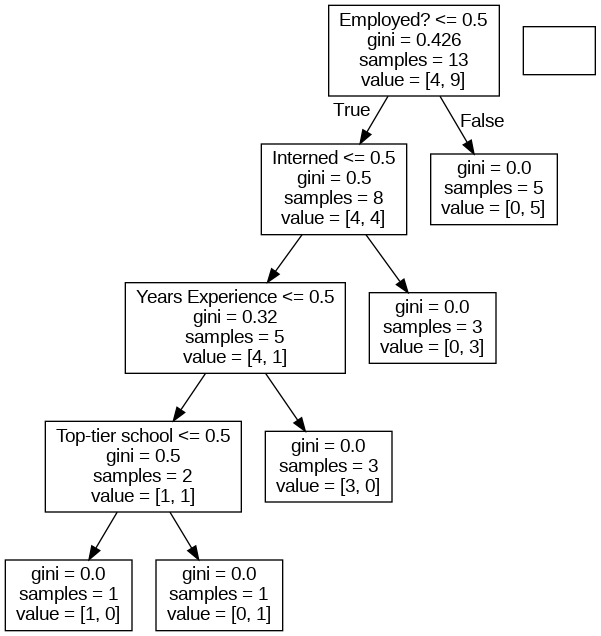

In [10]:
# Importa o módulo para exibir imagens diretamente no notebook (útil no Google Colab ou Jupyter)
from IPython.display import Image

# Importa StringIO para criar um fluxo de texto (buffer em memória)
from io import StringIO

# Importa a biblioteca pydotplus para gerar gráficos a partir da linguagem DOT
import pydotplus

# Cria um buffer de texto onde será armazenado o código DOT (estrutura da árvore de decisão)
dot_data = StringIO()

# Exporta o modelo da árvore de decisão em formato DOT, incluindo os nomes das features (variáveis)
tree.export_graphviz(clf, out_file=dot_data,
                     feature_names=features)

# Usa o conteúdo DOT gerado para criar o gráfico com pydotplus
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Converte o gráfico para imagem PNG e exibe no notebook
Image(graph.create_png())

# Ensemble Learning> Random Forest

In [12]:
# Importa o classificador Random Forest da biblioteca sklearn
from sklearn.ensemble import RandomForestClassifier

# Cria um modelo de Random Forest com 10 árvores de decisão (estimators)
clf = RandomForestClassifier(n_estimators=10)

# Treina o modelo com os dados de entrada (x) e os resultados esperados (y)
clf = clf.fit(x, y)

# Faz uma previsão para uma pessoa com as seguintes características:
# [10 anos de experiência, empregado, educação nível 4, sem estágio, sem top-tier school, sem PhD]
# A saída será 1 (contratado) ou 0 (não contratado)
print(clf.predict([[10, 1, 4, 0, 0, 0]]))

# Faz outra previsão para uma pessoa semelhante, mas que NÃO está empregada atualmente (0 no segundo valor)
print(clf.predict([[10, 0, 4, 0, 0, 0]]))

[1]
[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
